In [1]:
import requests #for downloading the web page

In [2]:
import pandas as pd

In [3]:
import time
import os #for file management and sleep while scraping

In [4]:
import numpy as np

In [5]:
from bs4 import BeautifulSoup #for getting text data from html. Главный рабочий инструмент.

In [15]:
urlPsyBasic = 'https://www.b17.ru/andrey_klementyev/'

In [20]:
page = requests.get(urlPsyBasic)

In [21]:
page.status_code #ахаха, он был заблочен на дубковском интернете, был код 503

200

In [22]:
soup = BeautifulSoup(page.content, 'lxml')

In [23]:
namePsych = soup.title.string #вот так, к примеру, можно выгрузить имя и проблемы. Решается частично умом, частично перебором.

In [24]:
problemsPsych = soup.p.text

In [66]:
max(soup.find_all('div', class_='response_list')[62].text.splitlines()) #можно так, но это непрактично.

'Алёна Викторовна, даже не думайте, мне очень дорого Ваше мнение, и так, как и я раскрываюсь Вам правдиво и искренне, точно так же я ценю и Ваше искреннее и правдивое мнение, мысли, вопросы и советы. Без этого наше общение было бы абсолютно бесполезным. Прошло совсем немного времени, как мы с Вами общаемся, а я каждый день чувствую непреодолимое желание заглянуть на сайт в надежде на новые Ваши сообщения)Отзыв из текста демо-консультации на форумеБыла 1 демо-консультация с пользователем.'

In [65]:
all_text = soup.find_all('div', {"class" : "response_list"})[3].find('div', class_='t').text #выгружает корректно!
#и сохраняется количество комментариев. Но смешивается ответ психолога с отзывом.

In [67]:
all_text.split('Ответ специалиста:')[1] #разделяем. Отлично, работает.

'Спасибо за ваш отклик. Да, первичная консультация по телефону бесплатная. Это помощь и ориентации в проблематике.К сожалению, я не консультирую бесплатно, кроме дело-консультации на форуме.'

In [267]:
all_comments = []
all_answers = []
all_text = []
for i in all_text:
    if 'Ответ специалиста:' in i:
        all_comments.append(i.split('Ответ специалиста:')[0])
        all_answers.append(i.split('Ответ специалиста:')[1])
    else:
        all_comments.append(i)
        all_answers.append('-')
pd.DataFrame({'Comments': all_comments, 'Answers': all_answers}).to_excel('test2.xlsx')
# так мы выгрузим отзывы и ответы к ним одного психолога в таблицу excel. Потом я код зашил в функцию.

In [277]:
# я очень постепенно убирал всё лишнее из строки. И только так смог выгрузить их. Наверное, можно было сделать и покороче. Но работает беспрекословно, ошибок не выдаёт.
def city_find(a = soup.find_all('div', class_='status-grey')):
    cities = []
    for i in a:
        cities.append(i.text)
    cities_clean = []

    for i in cities:
        for j in i.split('г. ')[1:]:
            cities_clean.append([x.strip() for x in j.split(',')])

    cities_row = []
    for i in cities_clean:
        for j in i:
            if j == '':
                del j
            else:
                cities_row.append(j)
    return [', '.join(cities_row)]

In [ ]:
# получает кусок текста одного отзыва. Делит на отзыв и ответ специалиста. И возвращает два листа с отзывами и комментариями.
def all_text_clean(all_text):
    all_comments = []
    all_answers = []
    for i in all_text: 
        if 'Ответ специалиста:' in i:
            all_comments.append(i.split('Ответ специалиста:')[0])
            all_answers.append(i.split('Ответ специалиста:')[1])
        else:
            all_comments.append(i)
            all_answers.append('')
    return all_comments, all_answers

In [ ]:
# убрал упоминания о демо-консультациях. Они вставляются сайтом автоматически. Получаю все отзывы как лист, возвращаю тоже их.
def cleaning_list_comments(all_comments):
    for i in range(len(all_comments)):
        if 'Была 1 демо-консультация' in all_comments[i]:
            all_comments[i] = all_comments[i].split('Была 1 демо-консультация')[0]
    for i in range(len(all_comments)):
        if 'Было 2 демо-консультации с пользователем' in all_comments[i]:
            all_comments[i] = all_comments[i].split('Было 2 демо-консультации с пользователем')[0]
    for i in range(len(all_comments)):
        if 'Отзыв из текста демо-консультации' in all_comments[i]:
            all_comments[i] = all_comments[i].split('Отзыв из текста демо-консультации')[0]
    return all_comments

In [ ]:
#далее вы увидите много переменных, листов. Их я тестировал вне функции, а потом занёс внутрь.

In [755]:
# в эту функцию загружаем id вида /something/ . Далее он выгружает целую таблицу в отдельный файл .xlsx . Только папочку лучше заранее создать.
def table_to_sep_files(ids):
    url = str('https://www.b17.ru' + ids)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml') #выгрузил данные
    all_text = []
    for i in range(len(soup.find_all('div', {"class" : "response_list"}))):
        all_text.append(soup.find_all('div', {"class" : "response_list"})[i].find('div', class_='t').text)
 #разделил комментарии   
    a = 2 + np.random.randn()
    if a < 0:
        time.sleep(2)
    else:
        time.sleep(a)
# необходима пауза, чтобы сайт не заблочил.
    all_comments, all_answers = all_text_clean(all_text)
# разделил отзывы
    linkPsych = 'https://www.b17.ru' + ids #link on the web page
# далее я выгружаю ещё некоторые данные. Так как там может их не быть, выпадает ошибка. Поэтому использую такую конструкцию.
    try:
        numberPubl = int(soup.find_all(id ='vkl_article')[0].find(class_='n').text)
    except:
        numberPubl = 'error'
    try:
        numberOtz = int(soup.find_all(id ='vkl_otzyv')[0].find(class_='n').text) 
    except:
        numberOtz = 'error'
    try:
        numberObratilis = int(soup.find_all(class_='box-admin')[0].text.split(' ')[1])
    except:
        numberObratilis = 'error'
    try:
        numberOnlKons = int(soup.find_all(class_='box-admin')[1].text.split(' ')[1])
    except:        
        numberOnlKons = 'error'
# город и длина всех отзывов, чтобы растянуть значения такие, как город и цифры.
    city = city_find(soup.find_all('div', class_='status-grey'))
    lenl = len(all_comments)
    
    return pd.DataFrame({'Comments': cleaning_list_comments(all_comments), 'Answers': all_answers, 'Link': [linkPsych]*lenl, 'Cities': city*lenl, 'Number of publications':[numberPubl]*lenl, 'Number of comments':[numberOtz]*lenl, 'Обратились': [numberObratilis]*lenl, 'Number of consultations': [numberOnlKons]*lenl})
# .to_excel(r'C:\Users\Professional\Jupyter Notebooks\parsPsy_left_comrades\{}.xlsx'.format(ids[1:len(ids)-1]), index = False) Лучше выгружать в файл вне функции, так как мультифункциональность внутри одной функции не есть хорошо.
# , 'comrad': [list_of_equal_work_change.pop()]*lenl Я распределял сначала работу прямо здесь, но это непрактично.

In [343]:
for i in all_id_unique:
    table_to_sep_files(i)    

In [5]:
# у нас есть словарь с id на каждой странице. Мы загружаем страницу, а он нам все id на этой странице.
def ids_on_page(page):
    return ids_dict[str(page)]

In [490]:
def list_of_tables(all_ids):
    table = []
    for i in all_ids:
        i = i.strip('/')
        table.append(pd.read_excel(r'C:\Users\Professional\Jupyter Notebooks\parsPsy7\{}.xlsx'.format(i)))
    return table

In [394]:
table_list_to_xlsx(table,'newTest6')

In [713]:
def table_from_pages_list_old(list_of_pages):
    table = []
    for i in list_of_pages:
        for j in ids_on_page(i):
            j = j.strip('/')
            table.append(pd.read_excel(r'C:\Users\Professional\Jupyter Notebooks\parsPsy5\{}.xlsx'.format(j)))
    return table

In [715]:
def table_list_to_xlsx_old(table, name):
    os.mkdir(str(name))
    pd.concat(table, axis = 0).to_excel(r'C:\Users\Professional\Jupyter Notebooks\{}\{}.xlsx'.format(name, name), index = False)

In [122]:
table_list_to_xlsx(table, name = 'varya')

In [716]:
table_list_to_xlsx_old(table_from_pages_list_old([296]), '296') # Вот это всё в строку решает!!!

In [131]:
table_from_pages_list(['200', '201'])

In [345]:
table_list_to_xlsx(table_from_pages_list(all_pages), 'test_all_pages')

In [351]:
all_test_ids = []
for i in all_pages:
    all_test_ids.append(ids_on_page(i))

In [359]:
all_test_ids = [x for y in all_test_ids for x in y]

In [364]:
all_test_ids_unique = pd.Series(all_test_ids).unique()

In [135]:
os.mkdir('testtest1', exist_ok=True) #код, чтобы создать папку и не получить ошибку в то же время.

In [ ]:
# выгрузка всех id со страницы. Научимся с 1, сделаем для всех остальных. Они однотипные.

In [84]:
urlMain = 'https://www.b17.ru/otzyv/online/?page=66'

In [85]:
pageMain = requests.get(urlMain)

In [86]:
soupMain = BeautifulSoup(pageMain.content, 'lxml')

In [93]:
endPage = int(soupMain.find(class_='page-list').text.split(' ')[-1]) #так мы можем выгрузить последнюю страницу

In [91]:
ids = soupMain.find_all(class_='f')

In [730]:
pages = np.arange(1,320).tolist()

In [731]:
basic_url = 'https://www.b17.ru/otzyv/online/?page='

In [732]:
all_url_pages = [basic_url + str(i) for i in pages]

In [30]:
def url_psychos_page(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    page = url.split('=')[1]
    fastlist = soup.find_all('div', class_='f')
    ids_dict = {}
    ids_list = []
    key = page

    for i in fastlist:
        ids_list.append(i.a.get('href'))
    a = 2 + np.random.randn()
    if a < 0:
        time.sleep(2)
    else:
        time.sleep(a)
    ids_dict[key] = ids_list
    return ids_dict

In [262]:
def all_url_psychos_page():
    for i in all_url_pages:
        page = requests.get(i)
        soup = BeautifulSoup(page.content, 'lxml')
#         page = url.split('=')[1]
        fastlist = soup.find_all('div', class_='f')
        for i in fastlist:
            ids.append(i.a.get('href'))
        a = 2 + np.random.randn()
        if a < 0:
            time.sleep(2)
        else:
            time.sleep(a)
        print(len(ids))
        print(ids[-1])
    return ids

In [733]:
#создаёт словарик, заполняет как {страница: лист из id}. Очень удобно. И возвращает словарь.
def all_url_psychos_with_page(list_of_urls):
    ids_dict = {}
    for i in list_of_urls:
        page = requests.get(i)
        soup = BeautifulSoup(page.content, 'lxml')
#         page = url.split('=')[1]
        fastlist = soup.find_all('div', class_='f')
        page_num = i.split('=')[1]
        ids_list = []
        key = page_num

        for i in fastlist:
            ids_list.append(i.a.get('href'))
        a = 2 + np.random.randn()
        if a < 0:
            time.sleep(2)
        else:
            time.sleep(a)
        print(len(ids_dict), page_num, ids_list[0])
        ids_dict[key] = ids_list
    return ids_dict

In [734]:
ids_dict_nexttry = all_url_psychos_with_page(all_url_pages)

0 1 /churkova/
1 2 /sycheva_help/
2 3 /135_79s/
3 4 /pollianna/
4 5 /olgafed5/
5 6 /athena-nova/
6 7 /a_vyukov/
7 8 /stukalov/
8 9 /mcgrady/
9 10 /dobronevopros/
10 11 /olgasvetlaya/
11 12 /deevlad/
12 13 /id162845/
13 14 /belanina1/
14 15 /belanina1/
15 16 /churkova/
16 17 /vog68/
17 18 /pinsker/
18 19 /vladislavmashin/
19 20 /anastasiyavyuga/
20 21 /oksana_poleshchuk/
21 22 /nekrasova_nataliya/
22 23 /margo_mar4enko/
23 24 /elshelepova/
24 25 /id222860/
25 26 /vyacheslavovich/
26 27 /bondarenko-t-a/
27 28 /voshojdenie/
28 29 /anastasiyavyuga/
29 30 /shukshina/
30 31 /nesmiijanova/
31 32 /a_vyukov/
32 33 /taganka/
33 34 /isnazarenko/
34 35 /lbf15911/
35 36 /oksana_yakovenko/
36 37 /shabanova/
37 38 /wladimirmahinya/
38 39 /july_a/
39 40 /sdremov/
40 41 /a_vyukov/
41 42 /id66994/
42 43 /zhurakovsky/
43 44 /zhurakovsky/
44 45 /zhurakovsky/
45 46 /elenklim/
46 47 /elena-balina/
47 48 /id180253/
48 49 /innaagap/
49 50 /korotina_svetlana/
50 51 /olgafed5/
51 52 /andriyanova1103/
52 53 /stu

In [865]:
with open("ids_dict_09_03.txt", "w") as f:
    f.write(str(ids_319_pages_09or10maybe))
#так мы можем сохранить словарь локально

In [6]:
dict1 = {}
with open("ids_dict_08_03.txt", "r") as f:
    dict1 = eval(f.read())
# а так выгружаем словарь из файла.

In [866]:
# all_id_unique = pd.Series(all_id).unique()

In [738]:
def all_id(some_dict):
    all_id = []
    for i in range(1, len(ids_dict) + 1):
        for j in ids_dict[str(i)]:
            all_id.append(j)
    return all_id

In [739]:
all_id_unique = pd.Series(all_id(ids_dict_nexttry)).unique()

In [318]:
len(all_id_unique)

NameError: name 'all_id_unique' is not defined

In [432]:
pd.Series(all_id).value_counts()

/cvetkova_ni/        149
/a_vyukov/           108
/kuzmichev/           98
/a2n/                 96
/volira/              94
                    ... 
/merilyn1981/          3
/volgina/              2
/sergeeva_milena/      1
/qweasd/               1
/chvalun/              1
Length: 297, dtype: int64

In [269]:
with open("ids.txt", "w") as f:
    for s in all_id:
        f.write(str(s) +"\n")
score = []
with open("ids.txt", "r") as f:
    for line in all_id:
        score.append(line.strip())


In [294]:
with open("ids_unique.txt", "w") as f:
    for s in all_id_unique:
        f.write(str(s) +"\n")


In [322]:
list_unique_ids = []
with open("ids_unique.txt", "r") as f:
    for line in f:
        list_unique_ids.append(line.strip())

In [324]:
len(list_unique_ids)

297

In [297]:
for i in all_id_unique:
    table(i)

In [150]:
comrads_dict = {}

In [ ]:
# далее я разбираюсь с тем, какую кому страницу кодировать.

In [5]:
comrads = pd.read_excel('comrads.xlsx') # Да, правильно писать comrades. Это моя ошибка.
comrads = comrads.iloc[:, 1:3]

In [6]:
comrads.head(10)

,Учащийся,страницы выдачи отзывов. От следующей страницы предыдущего участника до указанной (только кодируют)
0,Аблямитова Милена,2
1,Ананьева Евдокия,4
2,Белоусова Алена,6
3,Болдыгин Даниил,8
4,Веселовский Леонид,10
5,Грачёва Маргарита,12
6,Гутовский Илья,14
7,Еникеева Лия,16
8,Журбицкий Алексей,18
9,Князькина Алина,20


In [7]:
columns_double = [x for x in list(comrads.iloc[:,1]) if type(x) == int]  # создаю дубль колонки со страницами.

In [8]:
columns_double.insert(0, 0) #и её сдвигаю.

In [9]:
comrads['first'] = pd.Series(map(lambda x: 1 + x, columns_double)) # теперь они стоят рядом, правда тип в first float, но эти значения временные всё равно.

In [10]:
comrads.head(5)

,Учащийся,страницы выдачи отзывов. От следующей страницы предыдущего участника до указанной (только кодируют),first
0,Аблямитова Милена,2,1.0
1,Ананьева Евдокия,4,3.0
2,Белоусова Алена,6,5.0
3,Болдыгин Даниил,8,7.0
4,Веселовский Леонид,10,9.0


In [11]:
# Функция получает весь dataframe, потом выгружает лист с листами из страниц каждого учащегося
def list_of_pages(comrads): 
    comrads_temp = comrads.iloc[:174, 1:]
    b = []
    for i in range(174):
        first = int(comrads_temp.iloc[i, 1])
        end = int(comrads_temp.iloc[i, 0])
        k = []
        for i in range(first, end + 1):
            k.append(i)
        b.append(k)
    return b

In [12]:
all_list_of_pages = list_of_pages(comrads)

In [13]:
comrads = comrads.rename(columns = {'страницы выдачи отзывов. От следующей страницы предыдущего участника до указанной (только кодируют)' : 'end', 'double_pages':'first'})

In [14]:
comrads['pages'] = pd.Series(all_list_of_pages)

In [15]:
comrads = comrads.iloc[:174, :]

In [31]:
comrads[comrads.Учащийся.str.contains('Север')]

,Учащийся,end,first,pages
43,Северьянова Екатерина,88,87.0,"[87, 88]"


In [18]:
comrads_id_list = [171, 32, 49, 34, 30, 50, 140, 104, 121, 66, 39, 73, 15, 76, 29, 107, 35, 103, 125, 54, 113]

In [19]:
left_comrades = [65, 67, 71, 74, 58, 72]

In [32]:
add_comrades = [48, 40, 37, 116, 43, 44, 38, 148]

In [21]:
len(comrads_id_list)

21

In [33]:
comrads.iloc[add_comrades,:].drop(['end','first'],axis = 1).sort_values(by = 'pages')

,Учащийся,pages
37,Лобань Варвара,"[75, 76]"
38,Макашина Елизавета,"[77, 78]"
40,Ноткина Алиса,"[81, 82]"
43,Северьянова Екатерина,"[87, 88]"
44,Старовойт Екатерина,"[89, 90]"
48,Чернухина Юлия,"[97, 98]"
116,Мироненко Юлия,"[233, 234]"
148,Ушачева Юлия,[296]


In [24]:
def all_pages(comrads):
    all_pages = []
    for i in comrads.iloc[comrads_id_list,:]['pages']:
        for j in i:
            all_pages.append(j)
    return all_pages

In [25]:
def all_ids_by_pages(all_pages):
    all_test_ids = []
    for i in all_pages(comrads):
        all_test_ids.append(ids_on_page(i))
    return [x for y in all_test_ids for x in y]

In [742]:
len(all_ids_by_pages_unique(all_ids_by_pages(all_pages)))

261

In [418]:
def all_ids_by_pages_unique(ids_all):
    return pd.Series(ids_all).unique()

In [438]:
y = [x for x in comrads.iloc[comrads_id_list,0]]

In [476]:
def list_of_equal_work(comrads):
    list_of_working_comrads = [x for x in comrads.iloc[comrads_id_list,0]]
    list_of_working_comrads.remove('Ермаков Павел')
    list_all_work = []
    min_work = len(all_ids_by_pages_unique(all_ids_by_pages(all_pages))) // len(list_of_working_comrads) + 1
    left_work = len(all_ids_by_pages_unique(all_ids_by_pages(all_pages))) - (len(list_of_working_comrads) - 1) * min_work
    
    for i in list_of_working_comrads:
        if i == 'Москаленко Максим':
            list_all_work.append([i]*left_work)
        else:
            list_all_work.append([i]*min_work)
    return [x for y in list_all_work for x in y]


In [518]:
list_of_equal_work_change = list_of_equal_work(comrads)

In [529]:
# list_of_equal_work_change

In [520]:
for i in all_ids_by_pages_unique(all_ids_by_pages(all_pages)):
    table_to_sep_files(i)

In [24]:
def list_of_tables(all_ids):
    table = []
    for i in all_ids:
        i = i.strip('/')
        table.append(pd.read_excel(r'C:\Users\Professional\Jupyter Notebooks\parsPsy_final\{}.xlsx'.format(i)))
    return table

In [525]:
table_of_comrads = list_of_tables(all_ids_by_pages_unique(all_ids_by_pages(all_pages)))

In [25]:
def table_list_to_xlsx(table, name):
    os.mkdir(str(name))
    pd.concat(table, axis = 0).to_excel(r'C:\Users\Professional\Jupyter Notebooks\{}\{}.xlsx'.format(name, name), index = False)

In [526]:
table_list_to_xlsx(table_of_comrads, 'final')

In [26]:
comrads.iloc[comrads_id_list,:].drop(['end','first'],axis = 1).sort_values(by = 'pages')

,Учащийся,pages
15,Молчанова Вероника,"[31, 32]"
29,Виллевальд Софья,"[59, 60]"
30,Григорьев Даниил,"[61, 62]"
32,Ермаков Павел,"[65, 66]"
34,Исаева Варвара,"[69, 70]"
35,Королева Светлана,"[71, 72]"
39,Морунов Тимофей,"[79, 80]"
49,Ширяева Дарья,"[99, 100]"
50,Юлушев Салават,"[101, 102]"
54,Веденко Мария,"[109, 110]"


In [34]:
def dict_of_ids_of_each_comrad(comrads, what_dict, comrads_list = comrads_id_list):
    df_basic = comrads.iloc[comrads_list,:].drop(['end','first'],axis = 1).sort_values(by = 'pages')
    dict_of_ids = {}
    for i in range(len(df_basic)):
        dict_of_ids[df_basic.iloc[i, 0]] = ids_on_list_of_pages(df_basic.iloc[i, 1], what_dict)
    return dict_of_ids

In [35]:
def ids_on_list_of_pages(list_of_pages, what_dict):
    fastlist = []
    for i in list_of_pages:
        fastlist.append(what_dict[str(i)])
    return [x for y in fastlist for x in y]

In [602]:
# for key, value in dict1.items():
#     print(key, value)

In [52]:
def table_list_to_xlsx(table, name, name_root = 'final'):
    pd.concat(table, axis = 0).to_excel(r'C:\Users\Professional\Jupyter Notebooks\{}\{}.xlsx'.format(name_root, name), index = False)

In [55]:
def all_tables_final(table, what_dict, comrads_list = comrads_id_list, name_root = 'all_final'):
    try:
        os.mkdir(name_root)
    except:
        pass
    dict_all = dict_of_ids_of_each_comrad(comrads, what_dict)
    for key, values in dict_all.items():
        list_of_tables_final_one = []
        for i in values:
            name = key
            
            list_of_tables_final_one.append(table[table.iloc[:,3].str.contains(i)])
        table_list_to_xlsx(list_of_tables_final_one, name, name_root)

In [39]:
dict_all = dict_of_ids_of_each_comrad(comrads, dict1)
for key, values in dict_all.items():
    list_of_tables_final_one = []
    for i in values:
        print(i)

/sycheva_help/
/tianamur/
/volira/
/trukhina/
/burdakandrey/
/okhlobystina/
/pollianna/
/msemiletkina/
/malov/
/mar_balakina/
/vyacheslavovich/
/id287365/
/nekrasova_nataliya/
/a_vyukov/
/danilova03/
/ivanivanovichkuzmin/
/margo_mar4enko/
/beliu_2008/
/id222860/
/zhurakovsky/
/id54259/
/irynaglavaska/
/sngoglev/
/avianna/
/kuzmichev/
/ivanivanovichkuzmin/
/egorovamv/
/a_vyukov/
/milafisenko/
/ewdyuk/
/id287365/
/mbaiduk/
/grubova_olga/
/sycheva_help/
/id180253/
/shipocheva_elena/
/kuzmichev/
/burdakandrey/
/taganka/
/135_79s/
/beliu_2008/
/evgeniyakab_psycholog/
/velisvet/
/vyacheslavovich/
/pozharova_alexandra/
/kovalenko_/
/nesmiijanova/
/germanenko_vadim/
/jastbe/
/amaliatarkhanova/
/fofanoff/
/aryella/
/tianamur/
/id222860/
/voshojdenie/
/malov/
/135_79s/
/volira/
/id287365/
/sydorenko_viktoria/
/vedernikov/
/kuzmichev/
/komova_alena/
/anastasiyavyuga/
/sngoglev/
/razuvaev/
/burdakandrey/
/egorovamv/
/shabanova/
/andaranvv/
/marakon/
/bondarenko-t-a/
/rezultat/
/a_vyukov/
/belanina

In [56]:
all_tables_final(table_1, dict1, name_root = 'final3_test')

In [46]:
table_1[table_1.iloc[:,3].isna() == True]

,Unnamed: 0,"Разметка отзыва (п - положительный, н - нейтральный, о - отрицательный)",ответ психолога на отзыв,ссылка на профиль\n,пол (м или ж),возраст,"опыт работы психологом (количество лет, число)",Город,Количество публикаций на b17,Количество отзывов,...,Было ли высшее образование до психологического (ДА/нет),стоимость одной очной консультации (в рублях),"Проблемы с которыми работает (текст, через точку с запятой)","Психологические школы (текст, через точку с запятой)",Полный текст самопрезентации психолога,comrade,Заполненность описания психологов,Заполненность маркировки отзывов,"Заполненность описания оставшихся психологов (актуально для тех, кто пришёл сюда по обмену)","Заполненность маркировки оставшихся психологов (актуально для тех, кто пришёл сюда по обмену)"
5326,NaN,NaN,NaN,NaN,ж,-,-,NaN,NaN,NaN,...,да,2333,"с психотравмами, эмоциональными переживаниями,...",NaN,\nПредлагаю результативную индивидуальную рабо...,Чуприна Татьяна,NaN,NaN,NaN,NaN


In [5]:
table_1 = pd.read_excel(r'C:\Users\Professional\Downloads\final.xlsx')

In [6]:
def bar_comments(table_1):
    return (table_1.groupby('comrade').agg('count').iloc[:,1] / table_1.groupby('comrade').agg('count').iloc[:,0]).sort_values(ascending = False).plot.bar()

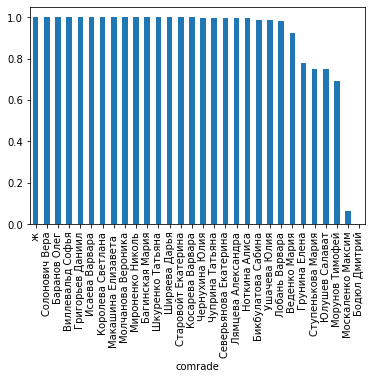

In [7]:
bar_comments(table_1)

In [8]:
def bar_representation(table_test):
    return (table_test.drop('comrade', 1).notna().groupby(table_1.comrade).sum() / table_test.drop('comrade', 1).isna().groupby(table_1.comrade).count()).iloc[:,20].sort_values(ascending = False).plot.bar()

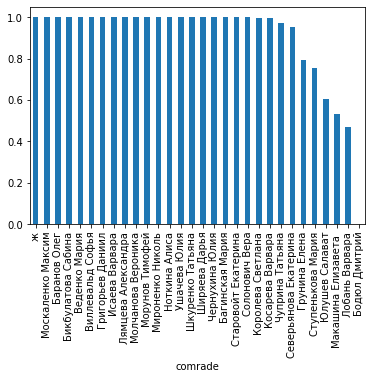

In [9]:
bar_representation(table_1)

In [76]:
def all_tables_final_negative(table, comrads_list = comrads_id_list, name_root = 'all_final'):
    try:
        os.mkdir(name_root)
    except:
        pass
    for i in comrads.iloc[comrads_id_list, 0].tolist():
        list_of_tables_final_one = []          
        list_of_tables_final_one.append(table[table.iloc[:, 1] == 'о'].sample(frac = 1))
        table_list_to_xlsx(list_of_tables_final_one, i, name_root)

In [77]:
all_tables_final_negative(table_1, name_root = 'negativeTest') #работает

In [100]:
table_1[table_1['Unnamed: 0'].str.len() > 4000]

,Unnamed: 0,"Разметка отзыва (п - положительный, н - нейтральный, о - отрицательный)",ответ психолога на отзыв,ссылка на профиль\n,пол (м или ж),возраст,"опыт работы психологом (количество лет, число)",Город,Количество публикаций на b17,Количество отзывов,...,Было ли высшее образование до психологического (ДА/нет),стоимость одной очной консультации (в рублях),"Проблемы с которыми работает (текст, через точку с запятой)","Психологические школы (текст, через точку с запятой)",Полный текст самопрезентации психолога,comrade,Заполненность описания психологов,Заполненность маркировки отзывов,"Заполненность описания оставшихся психологов (актуально для тех, кто пришёл сюда по обмену)","Заполненность маркировки оставшихся психологов (актуально для тех, кто пришёл сюда по обмену)"
1458,"Муж недавно сказал: ты меняешься, стала более ...",п,NaN,https://www.b17.ru/cvetkova_ni/,ж,64,21,Краснодар,25,310.0,...,да,5000,поиск глубинных причин трудностей,Гештальт-терапия; Когнитивная терапия; Личност...,Имею профессиональное образование высшее:\n1) ...,Шкуренко Татьяна,NaN,NaN,NaN,NaN
3065,Хочу оставить свой отзыв на работу Кузьмичёва ...,п,NaN,https://www.b17.ru/kuzmichev/,NaN,NaN,NaN,"Краснодар, Сочи, Новороссийск",1138,149.0,...,NaN,NaN,NaN,NaN,NaN,Баранов Олег,NaN,NaN,NaN,NaN
7733,В конце мая-июня 2015 года после 6 лет обучени...,п,"Рад, что помог Вам!Спасибо за отзыв!",https://www.b17.ru/safrgreat/,м,47,8,"Подольск, Чехов, Москва",105,55.0,...,нет,3000,Коррекция веса; Решение проблем личностного ро...,Гештальт-терапия; Гипнотерапия; Нейро-лингвист...,"Психотерапевт, психолог. \nУчастник и докладчи...",Лямцева Александра,NaN,NaN,NaN,NaN


In [749]:
razLess = all_ids_by_pages_unique(all_ids_by_pages(all_pages))

In [748]:
razMore = all_id_unique

In [753]:
ids_for_left_comrades = list(set(razMore) - set(razLess))

In [761]:
for i in ids_for_left_comrades:
    only_table(i)

In [765]:
def list_of_tables_left(all_ids):
    table = []
    for i in all_ids:
        i = i.strip('/')
        table.append(pd.read_excel(r'C:\Users\Professional\Jupyter Notebooks\parsPsy_left_comrades\{}.xlsx'.format(i)))
    return table

In [766]:
def table_list_to_xlsx_left(table, name):
    os.mkdir(str(name))
    pd.concat(table, axis = 0).to_excel(r'C:\Users\Professional\Jupyter Notebooks\{}\{}.xlsx'.format(name, name), index = False)

In [767]:
table_list_to_xlsx_left(list_of_tables_left(ids_for_left_comrades), '36')

In [769]:
table_left = pd.read_excel(r'C:\Users\Professional\Jupyter Notebooks\36\36.xlsx')

In [776]:
# table_left.groupby('Link').count()['Comments']

In [852]:
list_of_numbers = table_left.groupby('Link', sort = False).count()['Comments'].values

In [819]:
def some_yield():
    for i in list_of_numbers:
        for i in range(0, len(list_of_numbers), 6):
            yield list_of_numbers[i:i+6]

In [853]:
list_of_sum = [sum(list_of_numbers[i:i + 6]) for i in range(0, len(list_of_numbers), 6)]

In [854]:
list_of_all_num = []
for i in range(1,7):
    list_of_all_num.append([i] * list_of_sum[i - 1])

In [855]:
final_list_of_num = [x for y in list_of_all_num for x in y]

In [857]:
table_left['comrades'] = final_list_of_num

In [856]:
len(final_list_of_num)

368

In [847]:
len(list_of_all_num[0])

56

In [860]:
# table_left.groupby('Link').count()['Comments']

In [858]:
table_left.to_excel(r'C:\Users\Professional\Jupyter Notebooks\final_left\final_left.xlsx', index = False)

In [870]:
class ID:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
        
p1 = ID('Vasya', 18)
print(p1.name)
print(p1.age)
# было бы полезно такие штуки использовать.

Vasya
18


In [38]:
clean = pd.read_excel(r'C:\Users\Professional\Downloads\final_left.xlsx', index = False)

In [46]:
clean.isna().sum()

Unnamed: 0                                                                                               1
Разметка отзыва (п - положительный, н - нейтральный, о - отрицательный)                                  1
ответ психолога на отзыв                                                                               185
ссылка на профиль\n                                                                                      0
пол (м или ж)                                                                                            2
возраст                                                                                                  3
опыт работы психологом (количество лет, число)                                                           0
Город                                                                                                    0
Количество публикаций на b17                                                                             9
Количество отзывов                   

In [79]:
# clean[clean.iloc[:, 0].isna()]
# clean[clean.iloc[:, 4].isna()]
# clean[clean.iloc[:, 5].isna()].index + 2
a = 'количество онлайн-консультаций (число)'
b = 'Количество отзывов'
c = 'количество обратившихся'
d = 'Количество публикаций на b17'
clean[clean['количество курсов повышения квалификации (число)'].isna()].index + 2

Int64Index([123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 228, 229,
            230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240],
           dtype='int64')

In [49]:
clean[clean.loc['Количество публикаций на b17':''].isna()]

,Unnamed: 0,"Разметка отзыва (п - положительный, н - нейтральный, о - отрицательный)",ответ психолога на отзыв,ссылка на профиль\n,пол (м или ж),возраст,"опыт работы психологом (количество лет, число)",Город,Количество публикаций на b17,Количество отзывов,...,Было ли высшее образование до психологического (ДА/нет),стоимость одной очной консультации (в рублях),"Проблемы с которыми работает (текст, через точку с запятой)","Психологические школы (текст, через точку с запятой)",Полный текст самопрезентации психолога,comrade,Заполненность описания психологов,Заполненность маркировки отзывов,Описание психологов в основной таблице,Маркировка психологов в основной таблице
139,Обратился к Павлу в трудную минуту и не пожале...,п,Благодарю. Я высоко ценю Вашу оценку!,https://www.b17.ru/stegniy/,NaN,56.0,7,Кременчуг,184.0,12,...,ДА,200.0,"самооценка, внутренний конфликт; семейная псих...",Нейро-лингвистическое программирование; Психо...,"Практический психолог, психотерапевт, мастер с...",3,NaN,NaN,NaN,NaN
151,Спасибо Анастасии! Очень выручила меня! Всем с...,п,Сердцем- всегда на связи:),https://www.b17.ru/avetatur/,NaN,NaN,16,Сургут,72.0,5,...,нет,3000.0,напряжённые отношения и агрессия в паре; разли...,Арт-терапия;Гипнотерапия;Коучинг;Нейро-лингвис...,"Здравствуйте, меня зовут Анастасия.\nСамое важ...",3,NaN,NaN,NaN,NaN


In [45]:
clean[clean.iloc[:, 0].str.len() < 10]

,Unnamed: 0,"Разметка отзыва (п - положительный, н - нейтральный, о - отрицательный)",ответ психолога на отзыв,ссылка на профиль\n,пол (м или ж),возраст,"опыт работы психологом (количество лет, число)",Город,Количество публикаций на b17,Количество отзывов,...,Было ли высшее образование до психологического (ДА/нет),стоимость одной очной консультации (в рублях),"Проблемы с которыми работает (текст, через точку с запятой)","Психологические школы (текст, через точку с запятой)",Полный текст самопрезентации психолога,comrade,Заполненность описания психологов,Заполненность маркировки отзывов,Описание психологов в основной таблице,Маркировка психологов в основной таблице
30,Спасибо,п,Удачи вам!,https://www.b17.ru/reuzkaja/,ж,41.0,20,Саратов,249.0,20,...,нет,1800.0,Преодоление неуверенности в себе; преодоление ...,Арт-терапия; гештальт-терапия; телесно-ориенти...,"В жизни каждого человека, независимо от пола, ...",1,NaN,NaN,NaN,NaN
33,Спасибо),п,Удачи и благополучия!,https://www.b17.ru/reuzkaja/,ж,41.0,20,Саратов,249.0,20,...,нет,1800.0,Преодоление неуверенности в себе; преодоление ...,Арт-терапия; гештальт-терапия; телесно-ориенти...,"В жизни каждого человека, независимо от пола, ...",1,NaN,NaN,NaN,NaN
304,Спасибо!,н,NaN,https://www.b17.ru/dobronevopros/,м,29.0,3,"Кривой Рог, Киев",18.0,12,...,нет,1095.0,Самопознание; саморазвитие; поиск себя; Неудов...,Арт-терапия; Когнитивно-поведенческая терапия ...,"Получить консультацию\n52 обращения\nПсихолог,...",6,NaN,NaN,NaN,NaN
